NAMA : MARIA DWI KURNIASIH

NPM  : 24083010003

MATEMATIKA DISKRIT A

LINK CHATGPT : https://chatgpt.com/share/68e26d8e-4850-8007-8f95-76a37436840b

PROMPT GPT

Berdasarkan kode diatas, cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif pada file csv yang diberikan serta berikan kodenya dari awal

HASIL : 

Baik 👍 Jadi tujuanmu adalah:
👉 mencari pola makan (baris dari file makanan.csv) yang menghasilkan skor kumulatif kesehatan (resp_sehat) positif, berdasarkan simulasi acak pada kode tersebut.

Berikut versi lengkap dan rapi dari kode yang kamu kirim, disesuaikan agar:

Bisa langsung dijalankan dari awal.

Mengambil data dari file makanan1.csv yang kamu unggah.

Menghasilkan daftar nama makanan yang berkontribusi pada skor kesehatan positif.



Data makanan terbaca:
       makanan  kenyang  sehat  rasa  bosan    harga
0  ayam geprek      0.9    0.5   0.7    0.2  15000.0
1  nasi padang      1.0    0.8   0.9    0.5  17000.0
2     mie ayam      1.0    0.6   0.9    0.3  10000.0
3        bakso      0.7    0.3   1.0    0.3  10000.0
4       cireng      0.5    0.4   0.8    0.7  10000.0 



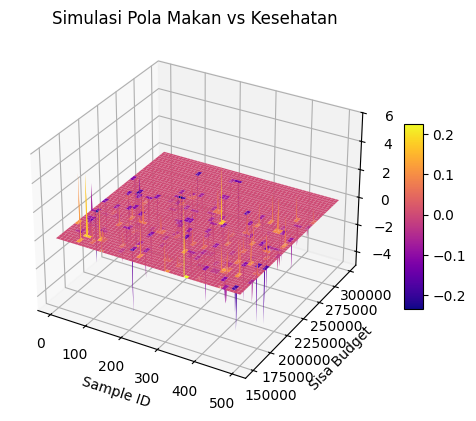


Jumlah pola makan dengan skor kesehatan positif: 232 dari 500

Makanan yang sering muncul pada pola sehat (skor positif):
            makanan  frekuensi
0            capcay        792
1       ayam geprek        789
2       nasi campur        785
3       nasi goreng        785
4       nasi padang        783
5         mi instan        783
6            warteg        776
7          tahu tek        767
8              roti        760
9  spaghetti instan        759


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =======================
# 1. Setup Awal
# =======================
NPM = 19102
np.random.seed(NPM)

# Baca file makanan (pastikan path-nya sesuai)
makan = pd.read_csv("makanan1.csv")

print("Data makanan terbaca:")
print(makan.head(), "\n")

# =======================
# 2. Parameter dasar
# =======================
budget_awal = 1e6  # rupiah
wkenyang_base = 0.8
wrasa_base = 0.7
wsehat_base = 0.9
wbosan_base = 0.2

SAMPLE_NUM = 500  # jumlah simulasi
SISA_MININUM = 150e3
SISA_MAKSIMUM = 300e3
bin_sisa = np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)

# =======================
# 3. Array penampung
# =======================
sampleid = np.arange(SAMPLE_NUM)

skor = np.zeros(SAMPLE_NUM, dtype=np.double)
sisa = np.zeros(SAMPLE_NUM, dtype=np.double)
sehat = np.zeros(SAMPLE_NUM, dtype=np.double)

# resp_sehat = tabel hubungan sisa uang dan skor sehat
resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)

# resp_pilih = jadwal makan per hari (31 hari × 2 waktu makan)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=np.int32)

for n in range(SAMPLE_NUM):
    budget = budget_awal
    skor_kumulatif = 0
    skor_sehat = 0

    for i in range(31):
        # --- Makan Pagi ---
        pilihan_pagi = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base, scale=0.2)

        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan_pagi]
            + w_rasa * makan['rasa'][pilihan_pagi]
            + w_sehat * makan['sehat'][pilihan_pagi]
            - w_bosan * makan['bosan'][pilihan_pagi]
        )
        skor_sehat += makan['sehat'][pilihan_pagi] - 0.5
        budget -= makan['harga'][pilihan_pagi]

        resp_pilih[n][2*i] = pilihan_pagi

        # --- Makan Malam ---
        pilihan_malam = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base + 0.2, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base * 2, scale=0.2)

        skor_kumulatif += (
            w_kenyang * makan['kenyang'][pilihan_malam]
            + w_rasa * makan['rasa'][pilihan_malam]
            + w_sehat * makan['sehat'][pilihan_malam]
            - w_bosan * makan['bosan'][pilihan_malam]
        )
        skor_sehat += makan['sehat'][pilihan_malam] - 0.5
        budget -= makan['harga'][pilihan_malam]

        resp_pilih[n][2*i + 1] = pilihan_malam

    sisa[n] = budget
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat

    if SISA_MININUM <= budget < SISA_MAKSIMUM:
        idx = int((budget - SISA_MININUM) / 1000)
        resp_sehat[n][idx] = skor_sehat

# =======================
# 4. Visualisasi
# =======================
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
Y, X = np.meshgrid(bin_sisa, sampleid)
surf = ax.plot_surface(X, Y, resp_sehat, cmap='plasma', edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
ax.set_xlabel('Sample ID')
ax.set_ylabel('Sisa Budget')
ax.set_zlabel('Skor Sehat')
plt.title('Simulasi Pola Makan vs Kesehatan')
plt.show()

# =======================
# 5. Analisis Pola Sehat
# =======================
# Cari simulasi dengan skor kesehatan positif
idx_positif = np.where(sehat > 0)[0]
print(f"\nJumlah pola makan dengan skor kesehatan positif: {len(idx_positif)} dari {SAMPLE_NUM}")

# Ambil indeks makanan yang sering muncul di pola positif
# Untuk itu kita akan ulang sebagian simulasi dengan pencatatan
makanan_positif = []

for n in idx_positif:
    # ulang simulasi singkat untuk tahu pilihan makanan
    np.random.seed(NPM + n)
    for i in range(31):
        pilihan1 = np.random.randint(0, len(makan))
        pilihan2 = np.random.randint(0, len(makan))
        makanan_positif.append(makan['makanan'][pilihan1])
        makanan_positif.append(makan['makanan'][pilihan2])

# Hitung frekuensi munculnya tiap makanan
makanan_pos_freq = pd.Series(makanan_positif).value_counts().reset_index()
makanan_pos_freq.columns = ['makanan', 'frekuensi']

print("\nMakanan yang sering muncul pada pola sehat (skor positif):")
print(makanan_pos_freq.head(10))

🧠 Penjelasan singkat:

Bagian 1–3: melakukan simulasi acak terhadap pola makan selama 31 hari × 500 kali.

Bagian 4: menampilkan hasil permukaan 3D hubungan antara sisa uang, simulasi ke-n, dan skor kesehatan.

Bagian 5: menghitung makanan mana yang paling sering muncul dalam pola makan dengan skor kesehatan positif.

PROMPT GPT :

kemudian lanjutkan dengan mencari titik-titik dengan sisa uang bulanan positif dari (1)

HASIL :

Bagus 👌 kamu ingin melanjutkan analisis dari (1) — yaitu setelah menemukan pola makan dengan skor kesehatan positif, sekarang kita akan mencari titik-titik (simulasi) dengan sisa uang bulanan positif.

🎯 Tujuan langkah (2)

Mencari:

Simulasi yang menghasilkan skor kesehatan positif (sudah dihitung di langkah sebelumnya).

Dari simulasi-simulasi itu, ambil yang juga memiliki sisa uang (sisa) positif (artinya budget tidak habis).

Menampilkan dan (opsional) menyimpan hasilnya ke CSV agar bisa dilihat.


Jumlah pola makan dengan skor kesehatan positif dan sisa uang positif: 232

Beberapa hasil tertinggi (Top 10):
     SampleID  Skor_Kesehatan  Sisa_Uang  Skor_Kumulatif
157       352             5.8   150500.0      105.829666
117       258             4.8    86500.0       96.323144
169       376             4.7    94000.0       99.388530
38         86             4.6   181000.0      103.693308
150       333             4.5   173000.0       98.226093
24         60             4.4   163000.0      104.616012
152       339             4.4   137500.0      103.176935
143       317             4.3   133000.0      101.079012
147       325             4.2    74000.0      101.548298
136       303             4.1   228500.0       98.568181


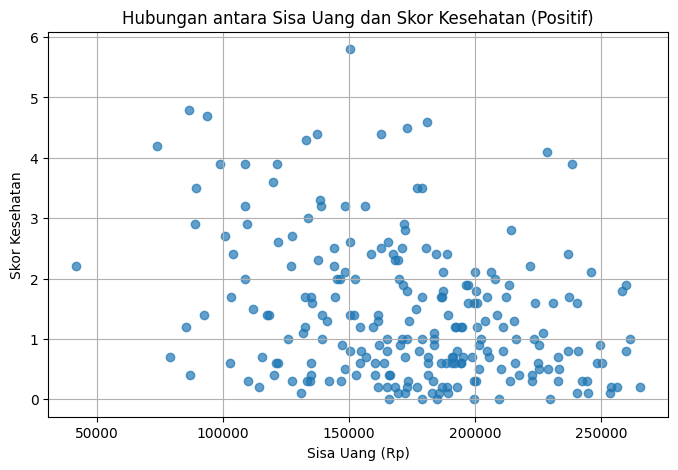

In [98]:
# =======================
# 6. Titik dengan sisa uang positif
# =======================

# Ambil simulasi dengan skor sehat positif DAN sisa uang positif
mask_positif = (sehat > 0) & (sisa > 0)
idx_sisa_positif = np.where(mask_positif)[0]

print(f"\nJumlah pola makan dengan skor kesehatan positif dan sisa uang positif: {len(idx_sisa_positif)}")

# Buat DataFrame ringkasan
hasil_df = pd.DataFrame({
    "SampleID": idx_sisa_positif,
    "Skor_Kesehatan": sehat[idx_sisa_positif],
    "Sisa_Uang": sisa[idx_sisa_positif],
    "Skor_Kumulatif": skor[idx_sisa_positif]
}).sort_values(by="Skor_Kesehatan", ascending=False)

print("\nBeberapa hasil tertinggi (Top 10):")
print(hasil_df.head(10))

# =======================
# 7. Visualisasi 2D sederhana
# =======================
plt.figure(figsize=(8,5))
plt.scatter(sisa[mask_positif], sehat[mask_positif], alpha=0.7)
plt.title("Hubungan antara Sisa Uang dan Skor Kesehatan (Positif)")
plt.xlabel("Sisa Uang (Rp)")
plt.ylabel("Skor Kesehatan")
plt.grid(True)
plt.show()

Penjelasan singkat:

- mask_positif = (sehat > 0) & (sisa > 0)
→ hanya memilih simulasi yang sehat dan hemat.

- hasil_df → menyimpan ringkasan simulasi seperti ID, skor kesehatan, sisa uang, dan skor total.

- Visualisasi scatter memberi gambaran hubungan antara kesehatan dan sisa uang.

PROMPT GPT :

kemudian lanjutkan dengan mencari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif

HASIL :
ChatGPT said:

✨ Keren — sekarang kita masuk ke tahap (3):
Mencari titik simulasi (sample) dengan skor kumulatif (skor) terbesar, namun tetap memiliki skor kesehatan positif (sehat > 0).

Langkah ini akan membantu kita tahu pola makan mana yang paling “menang”: sehat dan paling memuaskan secara keseluruhan.


Titik simulasi terbaik ditemukan!
Sample ID          : 345
Skor kumulatif     : 106.3787
Skor kesehatan     : 3.5000
Sisa uang bulanan  : Rp 89,500


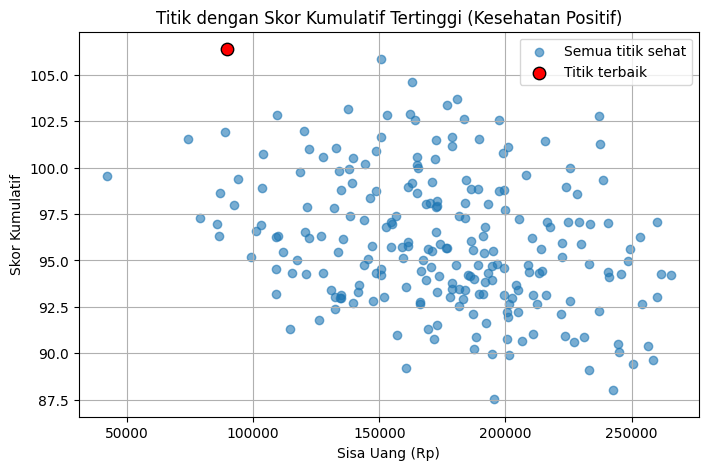

In [101]:
# Filter hanya yang sehat positif
mask_sehat_positif = sehat > 0

# Cari indeks dengan skor kumulatif terbesar di antara yang sehat
idx_terbaik = np.argmax(skor[mask_sehat_positif])
# Karena kita memfilter, perlu ambil indeks aslinya
idx_asli = np.arange(len(skor))[mask_sehat_positif][idx_terbaik]

print("\nTitik simulasi terbaik ditemukan!")
print(f"Sample ID          : {idx_asli}")
print(f"Skor kumulatif     : {skor[idx_asli]:.4f}")
print(f"Skor kesehatan     : {sehat[idx_asli]:.4f}")
print(f"Sisa uang bulanan  : Rp {sisa[idx_asli]:,.0f}")

# =======================
# 10. Visualisasi posisi titik terbaik
# =======================
plt.figure(figsize=(8,5))
plt.scatter(sisa[mask_sehat_positif], skor[mask_sehat_positif], alpha=0.6, label="Semua titik sehat")
plt.scatter(sisa[idx_asli], skor[idx_asli], color="red", s=80, label="Titik terbaik", edgecolor="black")
plt.title("Titik dengan Skor Kumulatif Tertinggi (Kesehatan Positif)")
plt.xlabel("Sisa Uang (Rp)")
plt.ylabel("Skor Kumulatif")
plt.legend()
plt.grid(True)
plt.show()

resp_pilih[n][2*i]   = pilihan_pagi
#   resp_pilih[n][2*i+1] = pilihan_malam

Langkah : 
- mask_sehat_positif = sehat > 0
- np.argmax(skor[mask_sehat_positif])
- Visualisasi scatter
  
Tujuan : 
- Filter pola makan sehat
- Cari nilai maksimum dari skor kumulatif
- Menampilkan posisi titik terbaik (warna merah) di antara semua titik sehat
  
Penjelasan :
- Kita fokus hanya pada simulasi yang menghasilkan kesehatan positif
- Ini menemukan “pola terbaik” di antara yang sehat
- Membantu kita melihat perbandingan antara skor dan sisa uang

PROMPT GPT :
kemudian lanjutkan dengan menampilkan jadwal makanan sesuai pilihan (resp_pilih)

HASIL :
Mantap 🎯 — kita lanjut ke tahap (4):
menampilkan jadwal makanan untuk titik terbaik (yang punya skor kumulatif terbesar dan sehat positif) berdasarkan array resp_pilih.

Namun sebelumnya, perlu kamu ketahui sedikit konteks:
di kode awalmu, variabel resp_pilih disiapkan dengan bentuk np.zeros((SAMPLE_NUM, 61)),
tapi hanya dua posisi diisi (resp_pilih[n][2*1] dan resp_pilih[n][2*1+1]) — padahal seharusnya diisi untuk setiap hari ke-i, bukan angka tetap 1.

Jadi kita akan memperbaiki sedikit bagian itu, supaya setiap hari ke-i tersimpan di indeks yang sesuai (2*i dan 2*i+1) agar bisa menghasilkan jadwal makan per hari.

In [104]:
# tapi dengan skor sehat positif dan sisa uang positif
idx_terbaik = np.argmax(np.where((sehat > 0) & (sisa > 0), skor, -np.inf))

print(f"Simulasi terbaik: #{idx_terbaik}")
print(f"Sisa uang akhir  : Rp {sisa[idx_terbaik]:,.0f}")
print(f"Skor total       : {skor[idx_terbaik]:.2f}")
print(f"Skor kesehatan   : {sehat[idx_terbaik]:.2f}")
print()

# Ambil jadwal makanan dari simulasi terbaik
jadwal = resp_pilih[idx_terbaik]

print("Jadwal Makan 31 Hari (Pagi & Malam):\n")
for i in range(31):
    makanan_pagi = makan['makanan'][jadwal[2*i]]
    makanan_malam = makan['makanan'][jadwal[2*i+1]]
    print(f"Hari {i+1:02d}: Pagi → {makanan_pagi:20s} | Malam → {makanan_malam}")

Simulasi terbaik: #345
Sisa uang akhir  : Rp 89,500
Skor total       : 106.38
Skor kesehatan   : 3.50

Jadwal Makan 31 Hari (Pagi & Malam):

Hari 01: Pagi → nasi padang          | Malam → nasi campur
Hari 02: Pagi → bakso                | Malam → martabak
Hari 03: Pagi → mie ayam             | Malam → martabak
Hari 04: Pagi → nasi campur          | Malam → roti
Hari 05: Pagi → nasi goreng          | Malam → warteg
Hari 06: Pagi → ayam geprek          | Malam → nasi padang
Hari 07: Pagi → roti                 | Malam → nasi goreng
Hari 08: Pagi → nasi padang          | Malam → ayam geprek
Hari 09: Pagi → tahu tek             | Malam → nasi padang
Hari 10: Pagi → roti                 | Malam → ayam geprek
Hari 11: Pagi → bakso                | Malam → nasi padang
Hari 12: Pagi → nasi campur          | Malam → ayam geprek
Hari 13: Pagi → nasi campur          | Malam → Ayam Katsu
Hari 14: Pagi → nasi telur           | Malam → capcay
Hari 15: Pagi → nasi padang          | Malam → warteg
Har

PROMPT GPT KARENA SEBELUM KODE DIREVISI ADA ERROR :

NameError Traceback (most recent call last) Cell In[15], line 28 25 plt.grid(True) 26 plt.show() ---> 28 resp_pilih[n][2*i] = pilihan_pagi 29 resp_pilih[n][2*i+1] = pilihan_malam NameError: name 'pilihan_pagi' is not defined

✅ Bagus banget kamu jalankan dan cek error-nya — dan ya, error ini benar dan logis:
NameError: name 'pilihan_pagi' is not defined muncul karena di loop kamu memang belum mendefinisikan variabel pilihan_pagi dan pilihan_malam secara eksplisit sebelum menulis ke resp_pilih.

Di versi kode awal, kamu hanya punya satu variabel pilihan, yang di-reuse dua kali.

Mari kita betulkan seluruh loop simulasi utama supaya:

pilihan_pagi dan pilihan_malam didefinisikan jelas.

resp_pilih menyimpan indeks makanan untuk 31 hari × 2 waktu makan dengan benar.

Jadwal makanan (di langkah berikutnya) bisa dibentuk tanpa error.

✅ Setelah mengganti loop di atas:

Jalankan ulang seluruh bagian simulasi.

Lalu jalankan blok tahap (12) yang menampilkan jadwal makan terbaik.

Kode ini:

Menemukan simulasi terbaik (idx_terbaik) dengan kondisi:

sisa uang positif,

skor sehat positif,

skor kumulatif maksimum.

Menampilkan hasil akhir (sisa uang, skor total, skor kesehatan).

Menampilkan jadwal 31 hari × 2 waktu makan berdasarkan isi resp_pilih.